# 1. 행렬과 연산
#### lv.4 
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/118670)

In [55]:
def matrix_print(matrix):
    print('--matrix--')
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(matrix[i][j], end='\t')
        print()

In [64]:
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix = matrix[-n:] + matrix[:-n]
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_u = matrix[0]                                     # 윗행
    outline_r = [matrix[i][-1] for i in range(1, len_h-1)]    # 오른쪽열( 위아래 제외)
    outline_d = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_l = [matrix[i][0] for i in range(len_h-2, 0, -1)] # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = outline_u + outline_r + outline_d + outline_l
    # print(outline_u, outline_r, outline_d, outline_l)
    # print(outline)
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    outline = outline[-n:] + outline[:-n]
    # print(outline, n)
    # 테두리를 상하좌우로 나눈다.
    outline_u = outline[:len_w]
    outline_r = outline[len_w:len_w+len_h-2]
    outline_d = outline[len_w+len_h-2:len_w+len_h-2+len_w][::-1]
    outline_l = outline[len_w+len_h-2+len_w:][::-1]
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline_u               #위쪽 행
    matrix[-1] = outline_d              #아래쪽 행 (다시 역순)
    for i in range(1, len_h-1):
        matrix[i][-1] = outline_r[i-1]  #오른쪽 열
        matrix[i][0] = outline_l[i-1]   #왼쪽 열 (다시 역순)
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    # matrix_print(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
        
    # matrix_print(rc)
    answer = rc
    return answer

In [65]:
matrix = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]]
matrix_print(matrix)
operations = ["Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","ShiftRow"]
print(solution(matrix, operations))

--matrix--
1	2	3	
4	5	6	
7	8	9	
10	11	12	
13	14	15	
--matrix--
1	2	3	
4	5	6	
7	8	9	
10	11	12	
13	14	15	
[1, 2, 3] [6, 9, 12] [15, 14, 13] [10, 7, 4]
[1, 2, 3, 6, 9, 12, 15, 14, 13, 10, 7, 4]
[2, 3, 6, 9, 12, 15, 14, 13, 10, 7, 4, 1] 11
--matrix--
2	3	6	
1	5	9	
4	8	12	
7	11	15	
10	13	14	
11 rotate
--matrix--
10	13	14	
2	3	6	
1	5	9	
4	8	12	
7	11	15	
1 shiftrow
--matrix--
10	13	14	
2	3	6	
1	5	9	
4	8	12	
7	11	15	
[[10, 13, 14], [2, 3, 6], [1, 5, 9], [4, 8, 12], [7, 11, 15]]


## 실패
- 효율성 테스트에서 시간초과.
- list의 문제(rc가 매우 큼)
    - 다른 자료구조를 찾아봐야 할듯.

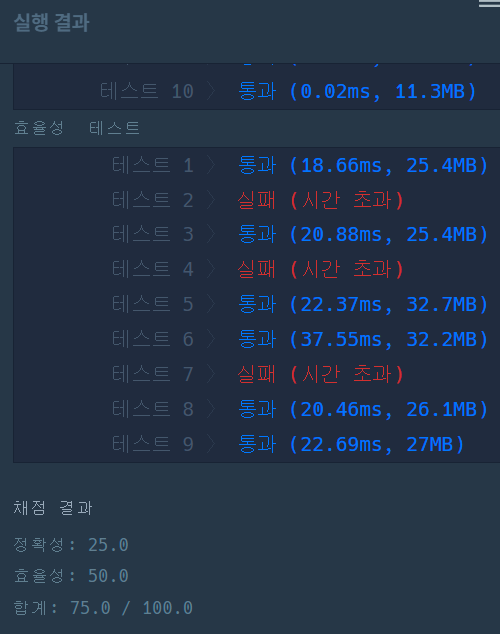

In [73]:
import numpy as np
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix = np.concatenate((matrix[-n:], matrix[:-n]))
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix : np.array, n : int):
    len_h, len_w = matrix.shape # 행렬의 세로, 가로 길이
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_u = matrix[0]                                     # 윗행
    outline_r = matrix[1:-1,-1]                               # 오른쪽열( 위아래 제외)
    outline_d = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_l = matrix[1:-1,0][::-1]                          # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = np.concatenate((outline_u, outline_r, outline_d, outline_l))
    # print(outline_u, outline_r, outline_d, outline_l)
    # print(outline)
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    outline = np.concatenate((outline[-n:], outline[:-n]))
    # print(outline, n)
    # 테두리를 상하좌우로 나눈다.
    outline_u = outline[:len_w]
    outline_r = outline[len_w:len_w+len_h-2]
    outline_d = outline[len_w+len_h-2:len_w+len_h-2+len_w][::-1] # 역순
    outline_l = outline[len_w+len_h-2+len_w:][::-1]              # 역순
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline_u               #위쪽 행
    matrix[1:-1,-1] = outline_r         #오른쪽 열
    matrix[-1] = outline_d              #아래쪽 행
    matrix[1:-1,0] = outline_l          #왼쪽 열
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    rc = np.array(rc)
    operations = np.array(operations)
    # matrix_print(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == operations.size - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
        
    # matrix_print(rc)
    answer = rc.tolist()
    return answer

## 실패
- numpy 배열을 이용한 풀이로 바꾸어봄 
    - 오히려 시간이 더 오래걸림.

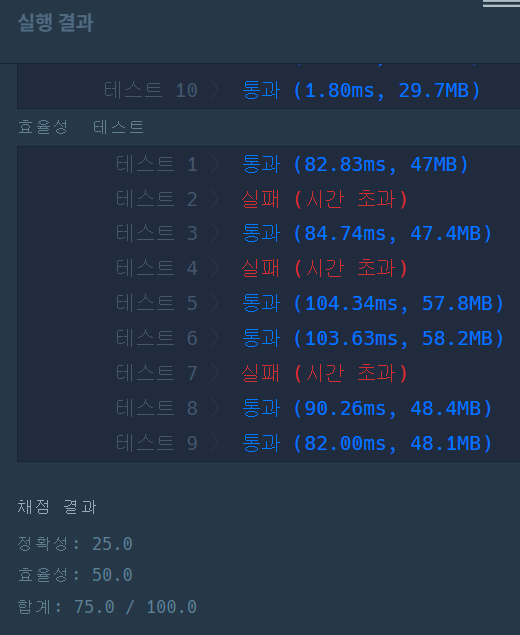

In [ ]:
from collections import deque
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix = matrix[-n:] + matrix[:-n]
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    
    outline_ = { 'u':[], 'r':[], 'd':[], 'l':[] }
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_['u'] = matrix[0]                                     # 윗행
    outline_['r'] = [matrix[i][-1] for i in range(1, len_h-1)]    # 오른쪽열( 위아래 제외)
    outline_['d'] = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_['l'] = [matrix[i][0] for i in range(len_h-2, 0, -1)] # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = deque(outline_['u'] + outline_['r'] + outline_['d'] + outline_['l'])
    # print(outline_u, outline_r, outline_d, outline_l)
    # print(outline)
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    for _ in range(n):
        outline.append(outline.popleft())
    # print(outline, n)
    # 테두리를 상하좌우로 나눈다.
    for k, v in outline_.items():
        
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline_u               #위쪽 행
    matrix[-1] = outline_d              #아래쪽 행 (다시 역순)
    for i in range(1, len_h-1):
        matrix[i][-1] = outline_r[i-1]  #오른쪽 열
        matrix[i][0] = outline_l[i-1]   #왼쪽 열 (다시 역순)
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    # matrix_print(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
        
    # matrix_print(rc)
    answer = rc
    return answer

In [72]:
from collections import deque
q = deque([1,2,3,4,5])
q[:-1]

TypeError: sequence index must be integer, not 'slice'

# 2. 
[문제 링크]()

## 성공
-

![img]()

# 3. 
[문제 링크]()

## 성공
-

![img]()

# 4. 
[문제 링크]()

## 성공
-

![img]()

# 5. 
[문제 링크]()

## 성공
-

![img]()